In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_style("whitegrid")

In [2]:
def readcsv(file):
    df = pd.read_csv(os.path.join('data', file), parse_dates=['Date'], dayfirst=True, index_col=['Date'])
    df = df[df != 0]
    return df

def trendplot(df, column):

    series = pd.DataFrame(df[column].dropna())

    fig, ax = plt.subplots(1, 2, figsize=(11,7))
    sns.boxplot(x=series.index.year, y=series[column], ax=ax[0])
    sns.boxplot(x=series.index.month, y=series[column], ax=ax[1])

    ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
    ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)
    ax[0].set_xlabel('year')
    ax[1].set_xlabel('month')
    ax[0].tick_params(axis='x', labelrotation=45)

def rainplot(df, year=None):
    columns = [column for column in df.columns if "Rainfall" in column]
    series = df[columns].dropna(how="all")
    if year:
        series = series[str(year)]
    ax = series.plot(alpha=.5, style='-o')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

def returnlocations(df, selector):
    from geopandas.tools import geocode
    names = [column.split(selector)[1].replace("_", " ") for column in df.columns if "Rainfall" in column]
    locs = ["{}, Italy".format(name) for name in names]
    gdf = geocode(list(locs))
    gdf['name'] = list(names)
    return gdf

def makemap(gdf):
    import contextily as ctx
    ax = gdf.plot(figsize=(11,9))
    ax.axis("off")
    ctx.add_basemap(ax, crs=gdf.crs.to_string())

    for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.name):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

In [3]:
df_aq_auser = readcsv('Aquifer_Auser.csv')
df_aq_auser.head(2)

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
Date,,,,,,,,,,,,,,,,,,,,,
1998-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


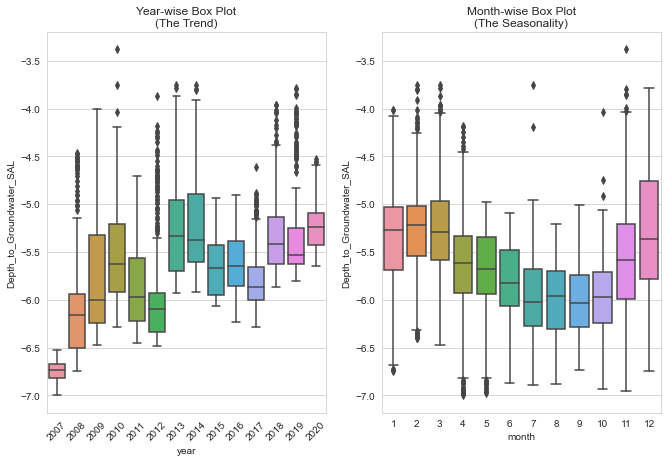

In [4]:
trendplot(df_aq_auser, 'Depth_to_Groundwater_SAL')

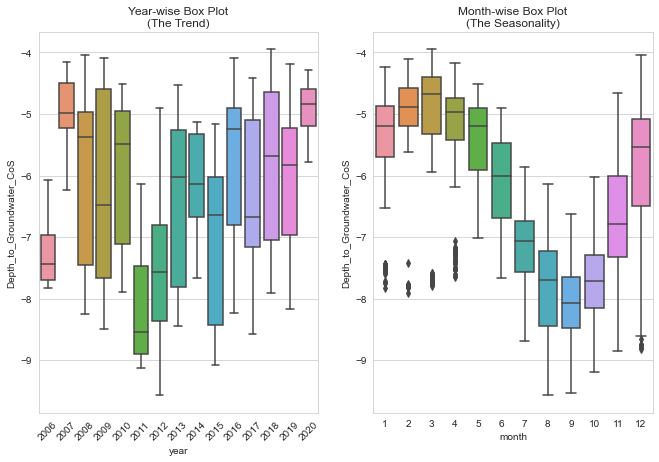

In [5]:
trendplot(df_aq_auser, 'Depth_to_Groundwater_CoS')

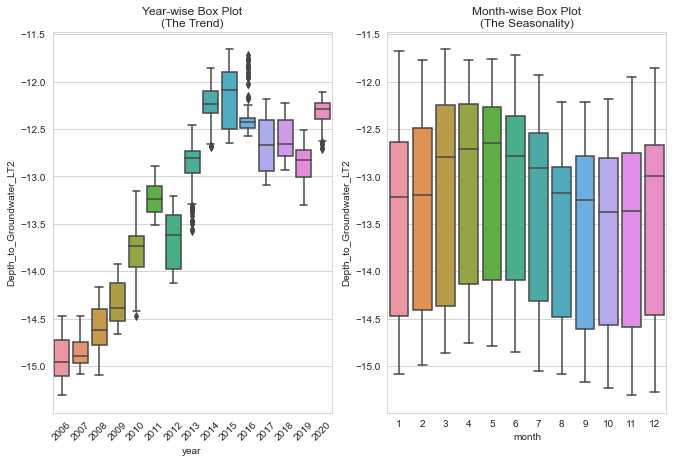

In [6]:
trendplot(df_aq_auser, 'Depth_to_Groundwater_LT2')

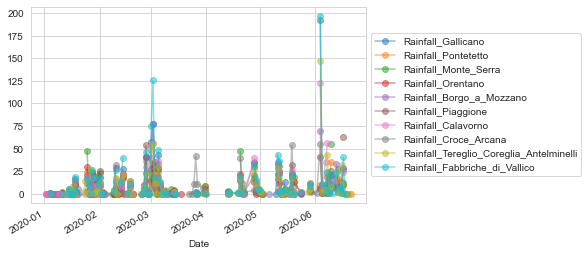

In [7]:
rainplot(df_aq_auser, year=2020)

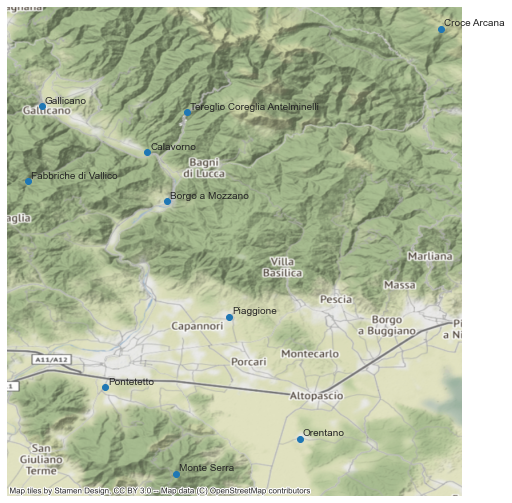

In [8]:
gdf = returnlocations(df_aq_auser, selector='Rainfall_')
makemap(gdf)

In [9]:
df_aq_auser.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8154 entries, 1998-03-05 to 2020-06-30
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rainfall_Gallicano                       2085 non-null   float64
 1   Rainfall_Pontetetto                      1945 non-null   float64
 2   Rainfall_Monte_Serra                     2143 non-null   float64
 3   Rainfall_Orentano                        2108 non-null   float64
 4   Rainfall_Borgo_a_Mozzano                 2002 non-null   float64
 5   Rainfall_Piaggione                       1726 non-null   float64
 6   Rainfall_Calavorno                       2204 non-null   float64
 7   Rainfall_Croce_Arcana                    2061 non-null   float64
 8   Rainfall_Tereglio_Coreglia_Antelminelli  2154 non-null   float64
 9   Rainfall_Fabbriche_di_Vallico            2269 non-null   float64
 10  Depth_to_Groundwater_LT2      

In [10]:
df_lake_bilancino = readcsv('Lake_Bilancino.csv')
df_lake_bilancino.head(2)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-06-03,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-04,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31


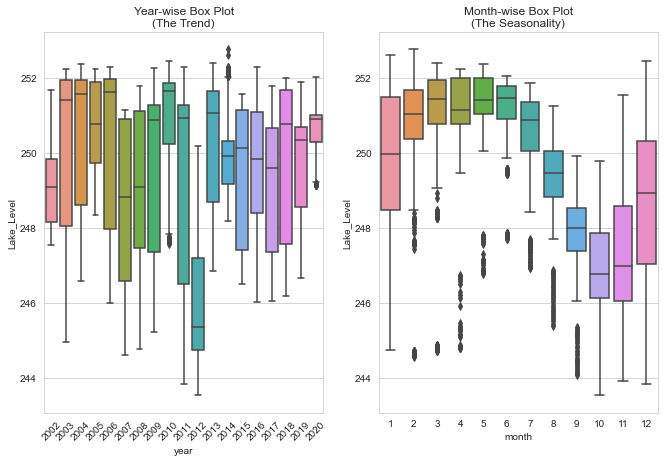

In [11]:
trendplot(df_lake_bilancino, 'Lake_Level')

In [12]:
df_lake_bilancino.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6603 entries, 2002-06-03 to 2020-06-30
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rainfall_S_Piero      2347 non-null   float64
 1   Rainfall_Mangona      2204 non-null   float64
 2   Rainfall_S_Agata      2271 non-null   float64
 3   Rainfall_Cavallina    1902 non-null   float64
 4   Rainfall_Le_Croci     2247 non-null   float64
 5   Temperature_Le_Croci  6024 non-null   float64
 6   Lake_Level            6603 non-null   float64
 7   Flow_Rate             6582 non-null   float64
dtypes: float64(8)
memory usage: 464.3 KB


In [13]:
df_river_arno = readcsv('River_Arno.csv')
df_river_arno.head(2)

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
Date,,,,,,,,,,,,,,,,
1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94


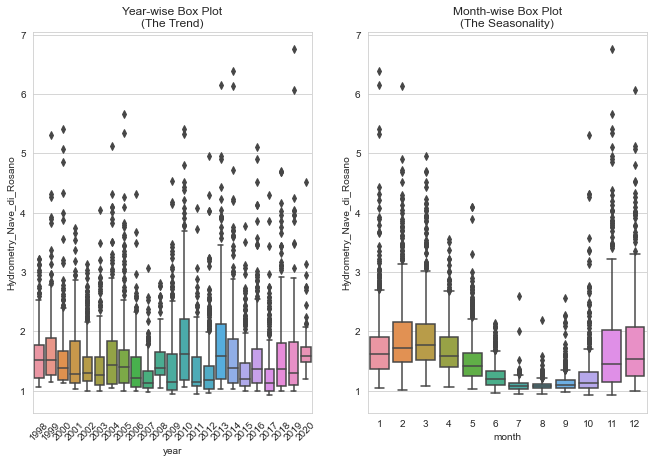

In [14]:
trendplot(df_river_arno, 'Hydrometry_Nave_di_Rosano')

In [15]:
df_river_arno.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8217 entries, 1998-01-01 to 2020-06-30
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rainfall_Le_Croci          2247 non-null   float64
 1   Rainfall_Cavallina         1902 non-null   float64
 2   Rainfall_S_Agata           2271 non-null   float64
 3   Rainfall_Mangona           2204 non-null   float64
 4   Rainfall_S_Piero           2347 non-null   float64
 5   Rainfall_Vernio            1617 non-null   float64
 6   Rainfall_Stia              478 non-null    float64
 7   Rainfall_Consuma           549 non-null    float64
 8   Rainfall_Incisa            1699 non-null   float64
 9   Rainfall_Montevarchi       565 non-null    float64
 10  Rainfall_S_Savino          520 non-null    float64
 11  Rainfall_Laterina          441 non-null    float64
 12  Rainfall_Bibbiena          876 non-null    float64
 13  Rainfall_Camaldoli         540

In [16]:
df_spring_lupa = readcsv('Water_Spring_Lupa.csv')
df_spring_lupa.head(2)

,Rainfall_Terni,Flow_Rate_Lupa
Date,,
2009-01-01,2.797,NaN
2009-01-02,2.797,NaN


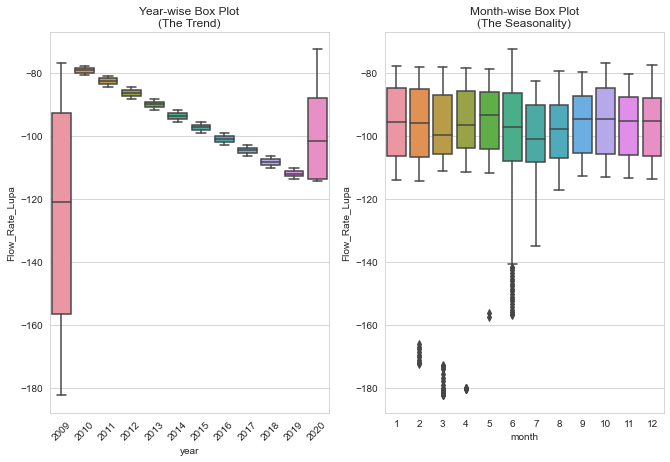

In [17]:
trendplot(df_spring_lupa, 'Flow_Rate_Lupa')

In [18]:
df_spring_lupa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4199 entries, 2009-01-01 to 2020-06-30
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rainfall_Terni  4096 non-null   float64
 1   Flow_Rate_Lupa  3816 non-null   float64
dtypes: float64(2)
memory usage: 98.4 KB
